<a href="https://colab.research.google.com/github/SalmaNurKeya/random-forest-/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
#Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
ds='/content/drive/MyDrive/customer_churn_dataset-training-master.csv'


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/customer_churn_dataset-training-master.csv')


In [ ]:

print("Training Data Shape:", df.shape)



Training Data Shape: (440833, 12)


In [ ]:
# Show first few rows
print("\nFirst few rows of training data:")
print(df.head())



First few rows of training data:
   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0 

In [ ]:
# Check for missing values
print("\nMissing values in training data:")
print(df.isnull().sum())



Missing values in training data:
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [ ]:
df.shape


(440833, 12)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [ ]:
df.describe()


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
#Check Actual Column Names
print("Training Columns:\n", df.columns.tolist())


Training Columns:
 ['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']


In [ ]:
#Training Columns: ['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support #Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last #Interaction', 'Churn']


In [ ]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Drop CustomerID
df.drop(columns=['CustomerID'], inplace=True)


In [ ]:
# Remove rows where target 'Churn' is NaN
df = df[df['Churn'].notna()].copy()


In [ ]:
# Convert 'Churn' to int
df['Churn'] = df['Churn'].astype(int)


In [ ]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Remove rows where target 'Churn' is NaN
df_filtered = df[df['Churn'].notna()].copy()

# Split features and target
X = df_filtered.drop('Churn', axis=1)
y = df_filtered['Churn']

In [ ]:
#Counting Class Values
import matplotlib.pyplot as plt
import seaborn as sns


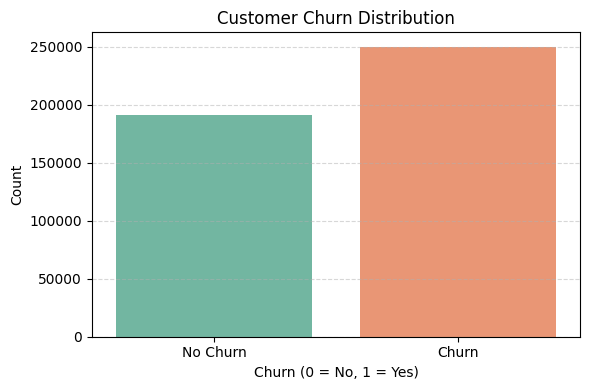

In [ ]:
# Plot class balance
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split


In [ ]:
# Split features and target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
#Train Random Forest (with class_weight)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [ ]:
#Evaluation with Full Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)


In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)


In [ ]:
# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)


In [ ]:
#Train Random Forest (with class_weight)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

#Evaluation with Full Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Print results
print(f"\nAccuracy:              {accuracy:.5f}")
print(f"Precision (PPV):        {precision:.5f}")
print(f"Recall (Sensitivity):   {recall:.5f}")
print(f"F1 Score:               {f1:.5f}")
print(f"ROC AUC:                {roc_auc:.5f}")
print(f"Specificity (TNR):      {specificity:.5f}")
print(f"False Positive Rate:    {fpr:.5f}")
print(f"False Negative Rate:    {fnr:.5f}")
print(f"Balanced Accuracy:      {balanced_acc:.5f}")
print(f"Matthews Corr Coef:     {mcc:.5f}")


Accuracy:              0.99938
Precision (PPV):        0.99938
Recall (Sensitivity):   0.99952
F1 Score:               0.99945
ROC AUC:                1.00000
Specificity (TNR):      0.99919
False Positive Rate:    0.00081
False Negative Rate:    0.00048
Balanced Accuracy:      0.99935
Matthews Corr Coef:     0.99873


In [ ]:


#Confusion Matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# Title
title = "Confusion Matrix - Random Forest"


In [33]:


# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})


In [34]:
# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [35]:


# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

[Text(0, 0.5, '0.0'), Text(0, 1.5, '1.0')]

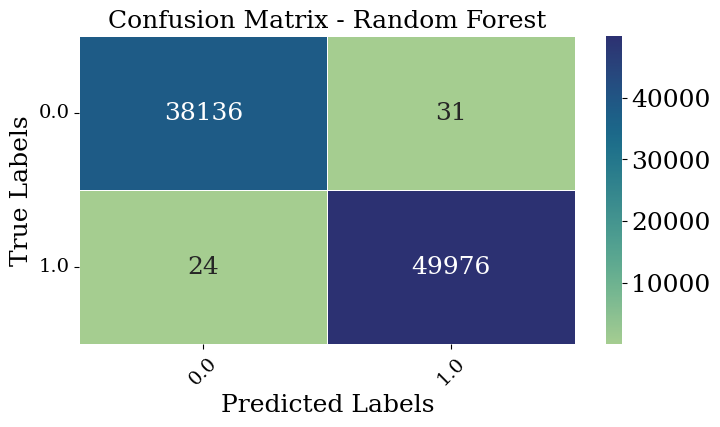

In [36]:
# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

In [37]:
# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [38]:
#ROC Curve

from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [ ]:
# Predict probability scores (for class 1)
y_prob_val = rf_model.predict_proba(X_test)[:, 1]  # assuming 'rf_model' is already trained

In [ ]:
# Compute FPR, TPR, and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_val)
roc_auc = roc_auc_score(y_test, y_prob_val)

In [39]:
# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Random Forest ROC (AUC = {roc_auc:.5f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'tpr' is not defined

<Figure size 700x500 with 0 Axes>

In [40]:
# Predict probability scores (for class 1)
y_prob_val = rf_model.predict_proba(X_test)[:, 1]  # assuming 'rf_model' is already trained

# Compute FPR, TPR, and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_val)
roc_auc = roc_auc_score(y_test, y_prob_val)

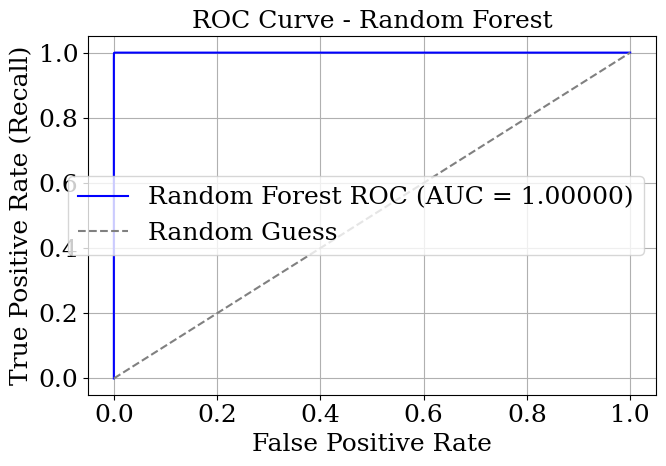

In [41]:
# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Random Forest ROC (AUC = {roc_auc:.5f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:

#Feature Importance

import matplotlib.pyplot as plt
import numpy as np

In [44]:

# Get feature importances
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

NameError: name 'features' is not defined

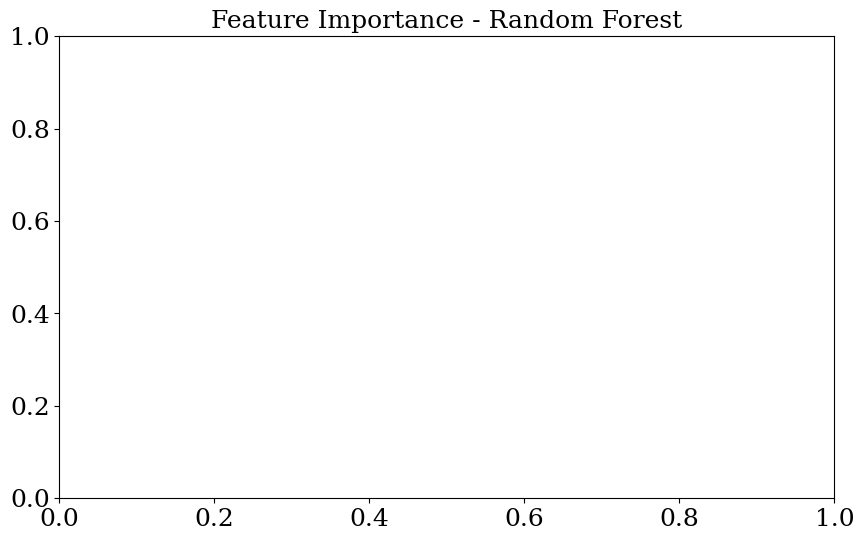

In [42]:

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(features)), importances[indices], align='center', color='green', edgecolor='black')
plt.xticks(range(len(features)), features[indices], rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)  # dashed grid
plt.tight_layout()
plt.show()

In [45]:
# Get feature importances
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

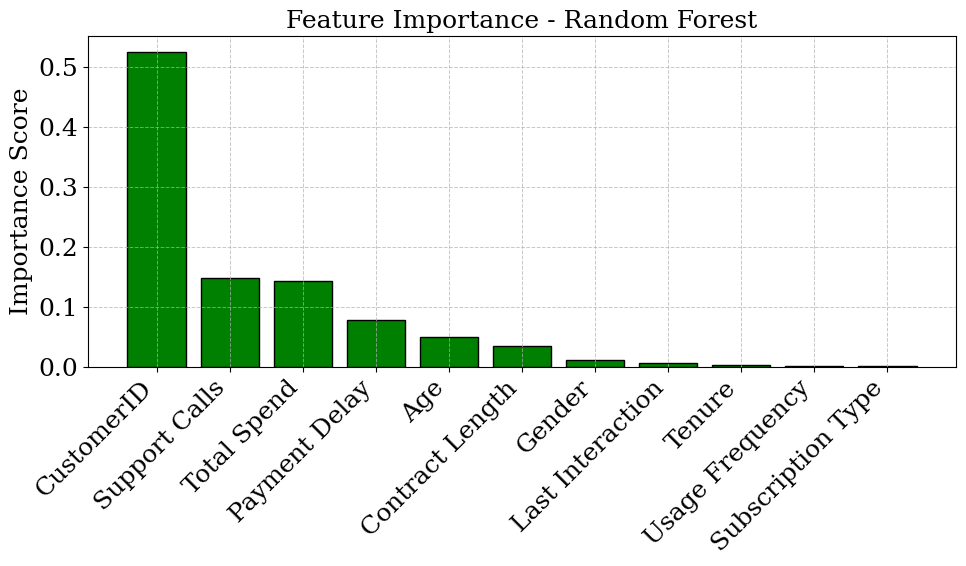

In [46]:
# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(features)), importances[indices], align='center', color='green', edgecolor='black')
plt.xticks(range(len(features)), features[indices], rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)  # dashed grid
plt.tight_layout()
plt.show()